In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales = pd.read_excel('Data_Analysis.xlsx',sheet_name='Sales',skiprows=5, header=1)

In [3]:
sales.head()

,Product Name,Order Number,Sales Channel,Quantity,Unit Price Before Discount,Unit Price AFTER Discount,Extended Price,Shipping Method
0,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping
1,PRODUCTAA,141492,CHANNEL A,1,195.0,143.52,143.52,Warehouse Pickup
2,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup
3,PRODUCTAAC,141493,CHANNEL W,1,435.0,348.00,348.00,Flat Rate Shipping
4,PRODUCTAAD,141494,CHANNEL A,4,10.0,60.00,240.00,Warehouse Pickup


In [4]:
sku = pd.read_excel('Data_Analysis.xlsx',sheet_name='productSKU',skiprows=3,header=0)
sku = sku[1:]

In [5]:
sku.head()

,Id,PRODUCT,Build Type,Shipping Weight,Default Cost,Shipping Width,Shipping Height,Shipping Depth,Sku Volume,Amazon Fd Color,...,Medium Id,Type,Model Stock Id,Inventory Type Id,Reorder Point,Quantity,Location Hierarchy Id,Configuration Schema In Sync,Houzz Category,Google Targeting Status
1,1697,PRODUCTA,3,48,173.00000,0,0,0,0,White,...,0,NaN,0,0,0,0,0,1,17001,4
2,1697,PRODUCTA,3,48,173.00000,0,0,0,0,Black,...,0,NaN,0,0,0,0,0,1,17001,4
3,862,PRODUCTAA,1,19.99,43.00000,1,1,1,0,Clear,...,0,NaN,0,0,0,0,0,1,14007,3
4,971,PRODUCTAAC,1,1.99,114.00000,0,0,0,0,Beige,...,0,NaN,0,0,0,0,0,1,14005,1
5,971,PRODUCTAAC,1,1.99,114.00000,0,0,0,0,Beige,...,0,NaN,0,0,0,0,0,1,14005,1


In [6]:
sku.columns

Index(['Id', 'PRODUCT', 'Build Type', 'Shipping Weight', 'Default Cost',
       'Shipping Width', 'Shipping Height', 'Shipping Depth', 'Sku Volume',
       'Amazon Fd Color', 'Amazon Lead Time To Ship', 'Amazon Style',
       'Amazon Style.1', 'CATEGORY', 'Amazon Fd Size',
       'Amazon Variation Theme', 'Amazon Specialfeatures4',
       'Amazon Specialfeatures5', 'Fulfillment Type', 'Amazon Update Delete',
       'Model Id', 'Default Vendor Id', 'Medium', 'Medium Id', 'Type',
       'Model Stock Id', 'Inventory Type Id', 'Reorder Point', 'Quantity',
       'Location Hierarchy Id', 'Configuration Schema In Sync',
       'Houzz Category', 'Google Targeting Status'],
      dtype='object')

In [7]:
sku = sku[['PRODUCT','Default Cost','CATEGORY']]

In [8]:
sku.head()

,PRODUCT,Default Cost,CATEGORY
1,PRODUCTA,173.00000,Bars
2,PRODUCTA,173.00000,Bars
3,PRODUCTAA,43.00000,End Tables
4,PRODUCTAAC,114.00000,Ottomans
5,PRODUCTAAC,114.00000,Ottomans


In [9]:
df = pd.merge(sales,sku,how = 'left',left_on = 'Product Name', right_on = 'PRODUCT')

In [10]:
df.drop('PRODUCT',axis= 1,inplace=True)

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df.head()

,Product Name,Order Number,Sales Channel,Quantity,Unit Price Before Discount,Unit Price AFTER Discount,Extended Price,Shipping Method,Default Cost,CATEGORY
0,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.00000,Bars
1,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.00000,Bars
2,PRODUCTAA,141492,CHANNEL A,1,195.0,143.52,143.52,Warehouse Pickup,43.00000,End Tables
3,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,388.00000,Tables
4,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,196.00000,Bars


In [13]:
df.shape

(3457, 10)

In [14]:
df.dtypes

Product Name                   object
Order Number                    int64
Sales Channel                  object
Quantity                        int64
Unit Price Before Discount    float64
Unit Price AFTER Discount     float64
Extended Price                float64
Shipping Method                object
Default Cost                   object
CATEGORY                       object
dtype: object

In [15]:
df['Default Cost']=df['Default Cost'].astype(float)

In [16]:
df.isnull().sum()

Product Name                    0
Order Number                    0
Sales Channel                   0
Quantity                        0
Unit Price Before Discount      0
Unit Price AFTER Discount       0
Extended Price                  0
Shipping Method                 0
Default Cost                    5
CATEGORY                      146
dtype: int64

In [17]:
df['profit'] = df['Extended Price'] - df['Default Cost']*df.Quantity

In [18]:
df['Sales Channel'].value_counts()

CHANNEL W    1299
CHANNEL A    1299
CHANNEL F     612
CHANNEL E     133
CHANNEL Z     114
Name: Sales Channel, dtype: int64

In [19]:
df['Shipping Method'].value_counts()

Flat Rate Shipping       1325
Warehouse Pickup          813
Delivery                  762
CARRYOUT                  189
Store Pickup              147
UPS Ground                103
Flat Rate White Glove     103
UPS 3 Day Select           11
FedEx GroundÂ®              2
Extended Area TBD           1
LTL White Glove             1
Name: Shipping Method, dtype: int64

In [20]:
df.CATEGORY.value_counts()

Vases                   1838
Lounge Chairs            182
Sofas                    129
Chairs                   123
End Tables               115
Sectionals               110
Beds                      98
Bars                      94
Ottomans                  79
Coffee Tables             75
Decorative Objects        60
Swing Chairs              59
Tables                    55
Office | Task Chairs      37
Filing | Shelving         33
Night Stands              32
Media | Shelving          30
Outdoor Furniture         27
Lighting                  24
Mirrors                   20
Console Tables            16
Pillows                   16
Rugs                      13
Art                       13
Dressers | Chests         11
Benches                    7
Sleepers                   6
Sculptures                 4
Buffets | Storage          4
Conference Tables          1
Name: CATEGORY, dtype: int64

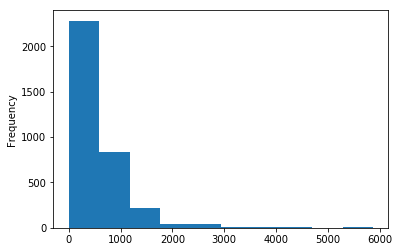

In [21]:
df['Extended Price'].plot.hist()

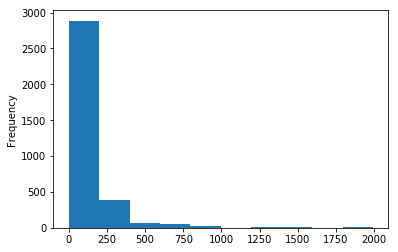

In [22]:
df['Default Cost'].plot.hist()

In [23]:
df.head()

,Product Name,Order Number,Sales Channel,Quantity,Unit Price Before Discount,Unit Price AFTER Discount,Extended Price,Shipping Method,Default Cost,CATEGORY,profit
0,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.0,Bars,226.00
1,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.0,Bars,226.00
2,PRODUCTAA,141492,CHANNEL A,1,195.0,143.52,143.52,Warehouse Pickup,43.0,End Tables,100.52
3,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,388.0,Tables,-100.17
4,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,196.0,Bars,91.83


In [24]:
revenue_channel = df.groupby('Sales Channel')['Extended Price'].sum()

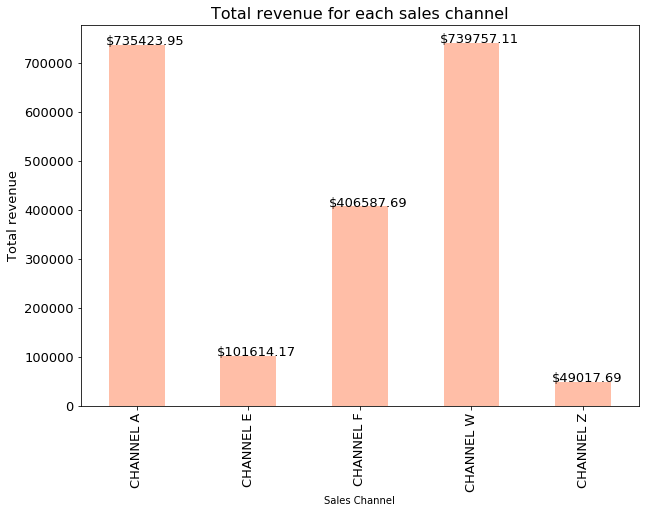

In [25]:
ax = df.groupby('Sales Channel')['Extended Price'].sum().plot.bar(figsize\
            = (10,7),color = 'coral',fontsize = 13,alpha = 0.5)
ax.set_title('Total revenue for each sales channel',fontsize = 16)
ax.set_ylabel('Total revenue',fontsize = 13)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i,value in enumerate(ax.patches):
    ax.text(value.get_x()-0.03,value.get_height()+0.5,'$'+str(round(df.groupby('Sales Channel')['Extended Price'].sum()[i],2))\
           ,fontsize = 13)

In [26]:
profit_channel = df.groupby('Sales Channel')['profit'].sum()

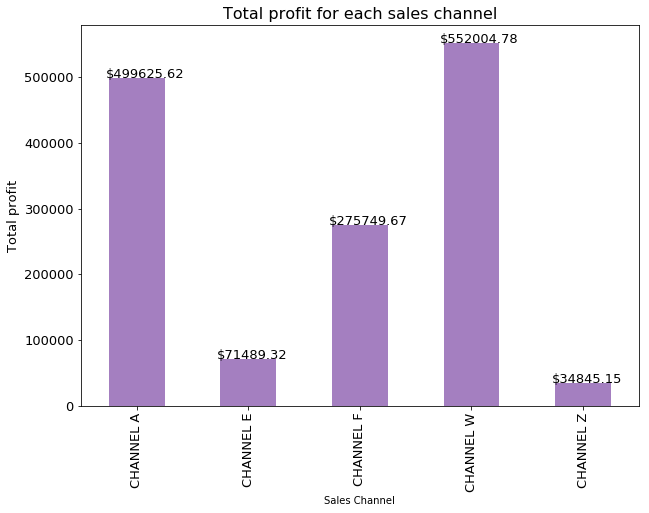

In [27]:
ax = df.groupby('Sales Channel')['profit'].sum().plot.bar(figsize\
            = (10,7),color = 'indigo',fontsize = 13,alpha = 0.5)
ax.set_title('Total profit for each sales channel',fontsize = 16)
ax.set_ylabel('Total profit',fontsize = 13)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i,value in enumerate(ax.patches):
    ax.text(value.get_x()-0.03,value.get_height()+0.5,'$'+str(round(df.groupby('Sales Channel')['profit'].sum()[i],2))\
           ,fontsize = 13)

In [28]:
ax = df.groupby('Sales Channel')['profit_pct'].mean().plot.bar(figsize\
            = (10,7),color = 'indigo',fontsize = 13,alpha = 0.5)
ax.set_title('Average profit percentage for each sales channel',fontsize = 16)
ax.set_ylabel('Total profit',fontsize = 13)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i,value in enumerate(ax.patches):
    ax.text(value.get_x()+0.03,value.get_height()+0.5,str(round(df.groupby('Sales Channel')['profit_pct'].mean()[i],2))\
           ,fontsize = 13)

KeyError: 'Column not found: profit_pct'

In [29]:
channel = pd.concat([revenue_channel,profit_channel],axis = 1)

In [30]:
channel

,Extended Price,profit
Sales Channel,,
CHANNEL A,735423.95,499625.62
CHANNEL E,101614.17,71489.32
CHANNEL F,406587.69,275749.67
CHANNEL W,739757.11,552004.78
CHANNEL Z,49017.69,34845.15


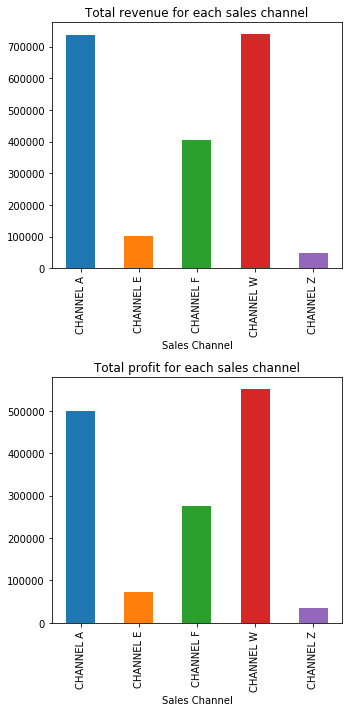

In [31]:
# what is the profitbility by channel?
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (5,10))
df.groupby('Sales Channel')['Extended Price'].sum().plot.bar(title = 'Total revenue for each sales channel',ax=ax1)
df.groupby('Sales Channel')['profit'].sum().plot.bar(title = 'Total profit for each sales channel',ax=ax2)
plt.tight_layout()

In [32]:
df.head()

,Product Name,Order Number,Sales Channel,Quantity,Unit Price Before Discount,Unit Price AFTER Discount,Extended Price,Shipping Method,Default Cost,CATEGORY,profit
0,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.0,Bars,226.00
1,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.0,Bars,226.00
2,PRODUCTAA,141492,CHANNEL A,1,195.0,143.52,143.52,Warehouse Pickup,43.0,End Tables,100.52
3,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,388.0,Tables,-100.17
4,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,196.0,Bars,91.83


In [33]:
# what is the best item we sell?
df.groupby('Product Name')['Extended Price'].sum().sort_values(ascending = False).head()

Product Name
PRODUCTAHC    337206.48
PRODUCTASC    130096.26
PRODUCTAY      92124.90
PRODUCTCC      86676.75
PRODUCTAM      48325.32
Name: Extended Price, dtype: float64

In [34]:
df.groupby('Product Name')['profit'].sum().sort_values(ascending = False).head()

Product Name
PRODUCTAHC    261856.48
PRODUCTASC     94186.26
PRODUCTAY      68114.90
PRODUCTCC      67056.75
PRODUCTAM      35635.32
Name: profit, dtype: float64

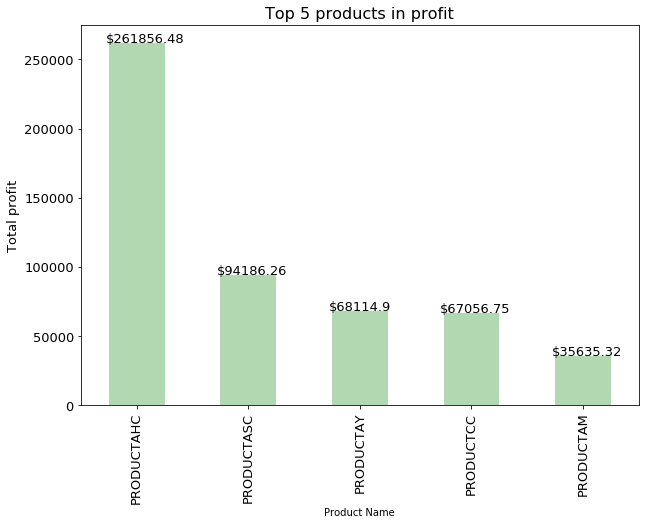

In [35]:
ax = df.groupby('Product Name')['profit'].sum().sort_values(ascending = False).head().plot.bar(figsize\
            = (10,7),color = 'g',fontsize = 13,alpha = 0.3)
ax.set_title('Top 5 products in profit',fontsize = 16)
ax.set_ylabel('Total profit',fontsize = 13)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i,value in enumerate(ax.patches):
    ax.text(value.get_x()-0.03,value.get_height()+0.5,'$'+str(round(df.groupby('Product Name')['profit'].sum().sort_values(ascending = False).head()[i],2))\
           ,fontsize = 13)

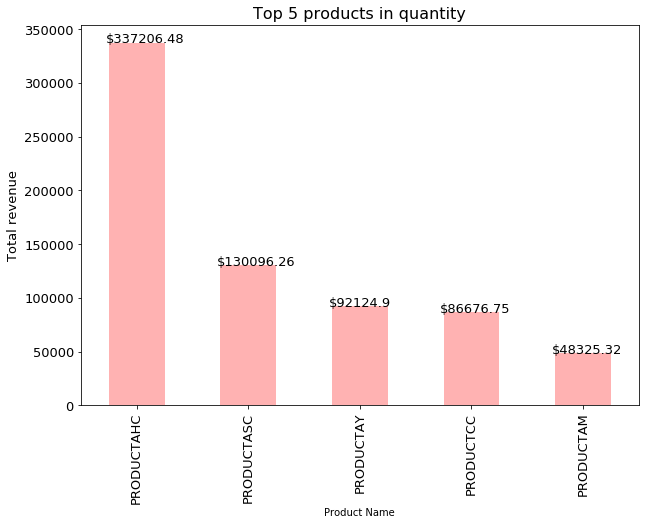

In [36]:
ax = df.groupby('Product Name')['Extended Price'].sum().sort_values(ascending = False).head().plot.bar(figsize\
            = (10,7),color = 'r',fontsize = 13,alpha = 0.3)
ax.set_title('Top 5 products in quantity',fontsize = 16)
ax.set_ylabel('Total revenue',fontsize = 13)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i,value in enumerate(ax.patches):
    ax.text(value.get_x()-0.03,value.get_height()+0.5,'$'+str(round(df.groupby('Product Name')['Extended Price'].sum().sort_values(ascending = False).head()[i],2))\
           ,fontsize = 13)

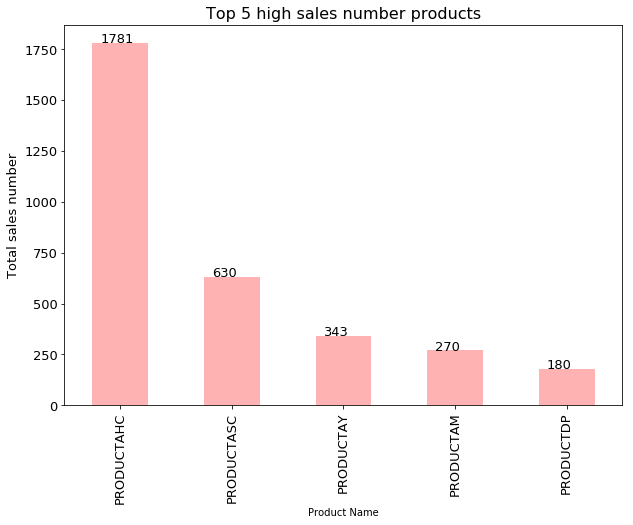

In [37]:
ax = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending = False).head().plot.bar(figsize\
            = (10,7),color = 'r',fontsize = 13,alpha = 0.3)
ax.set_title('Top 5 high sales number products',fontsize = 16)
ax.set_ylabel('Total sales number',fontsize = 13)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i,value in enumerate(ax.patches):
    ax.text(value.get_x()+0.07,value.get_height()+0.5,str(round(df.groupby('Product Name')['Quantity'].sum().sort_values(ascending = False).head()[i],2))\
           ,fontsize = 13)

In [38]:
df.groupby('Product Name')['Quantity'].sum().sort_values(ascending = False).head()

Product Name
PRODUCTAHC    1781
PRODUCTASC     630
PRODUCTAY      343
PRODUCTAM      270
PRODUCTDP      180
Name: Quantity, dtype: int64

In [39]:
# what is the most profit category?
df.groupby('CATEGORY').profit.sum().sort_values(ascending = False).head()

CATEGORY
Vases            602410.81
Sectionals       156591.02
Sofas            104694.47
Beds              86032.34
Lounge Chairs     80357.75
Name: profit, dtype: float64

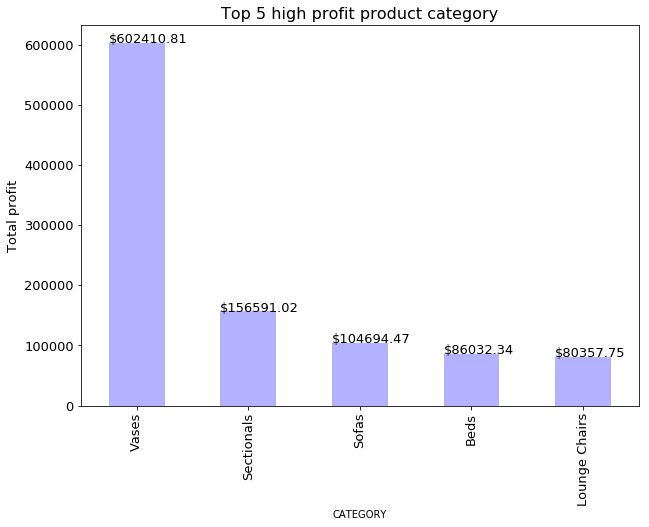

In [40]:
ax = df.groupby('CATEGORY')['profit'].sum().sort_values(ascending = False).head().plot.bar(figsize\
            = (10,7),color = 'b',fontsize = 13,alpha = 0.3)
ax.set_title('Top 5 high profit product category',fontsize = 16)
ax.set_ylabel('Total profit',fontsize = 13)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i,value in enumerate(ax.patches):
    ax.text(value.get_x(),value.get_height()+0.5,'$'+str(round(df.groupby('CATEGORY')['profit'].sum().sort_values(ascending = False).head()[i],2))\
           ,fontsize = 13)

In [41]:
df.groupby('CATEGORY')['Extended Price'].sum().sort_values(ascending = False).head()

CATEGORY
Vases            804376.81
Sectionals       254681.02
Sofas            148179.47
Beds             122960.34
Lounge Chairs    110689.65
Name: Extended Price, dtype: float64

In [50]:
# Does discount percentage brings more anenue or profit? if yes, which discount percentage is the best?
df['discount'] =((df['Unit Price Before Discount'] - df['Unit Price AFTER Discount'])/df['Unit Price Before Discount'])*100

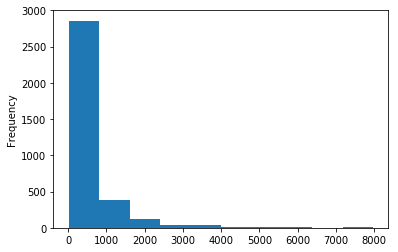

In [43]:
df['Unit Price Before Discount'].plot.hist()

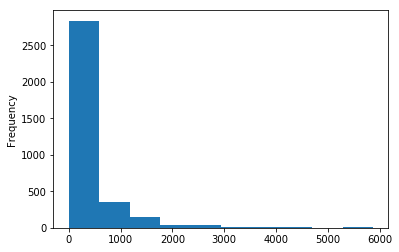

In [44]:
df['Unit Price AFTER Discount'].plot.hist()

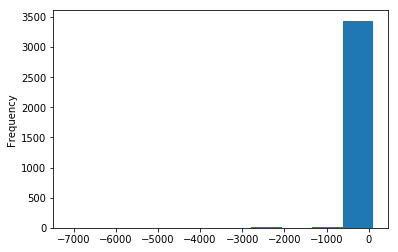

In [51]:
df.discount.plot.hist()

In [54]:
df[df.discount <0]

,Product Name,Order Number,Sales Channel,Quantity,Unit Price Before Discount,Unit Price AFTER Discount,Extended Price,Shipping Method,Default Cost,CATEGORY,profit,discount
7,PRODUCTAAD,141494,CHANNEL A,4,10.0,60.00,240.00,Warehouse Pickup,1.0,NaN,236.00,-500.00
83,PRODUCTAI,141512,CHANNEL A,1,10.0,409.50,409.50,Warehouse Pickup,1.0,NaN,408.50,-3995.00
96,PRODUCTAL,141518,CHANNEL A,1,100.0,120.00,120.00,Delivery,50.0,NaN,70.00,-20.00
134,PRODUCTAI,141529,CHANNEL A,1,10.0,721.50,721.50,Delivery,1.0,NaN,720.50,-7115.00
217,PRODUCTAI,141547,CHANNEL A,1,10.0,678.16,678.16,Delivery,1.0,NaN,677.16,-6681.60
218,PRODUCTAL,141547,CHANNEL A,1,100.0,204.50,204.50,CARRYOUT,50.0,NaN,154.50,-104.50
242,PRODUCTAL,141551,CHANNEL F,1,100.0,183.63,183.63,Delivery,50.0,NaN,133.63,-83.63
257,PRODUCTAL,141554,CHANNEL F,1,100.0,180.69,180.69,Warehouse Pickup,50.0,NaN,130.69,-80.69
268,PRODUCTAI,141555,CHANNEL A,1,10.0,99.36,99.36,Warehouse Pickup,1.0,NaN,98.36,-893.60
347,PRODUCTAL,141563,CHANNEL A,1,100.0,400.00,400.00,Delivery,50.0,NaN,350.00,-300.00


In [55]:
df.loc[df.discount<0,'discount'] = np.nan

In [59]:
df[['discount','profit']].corr()

,discount,profit
discount,1.00000,-0.11505
profit,-0.11505,1.00000


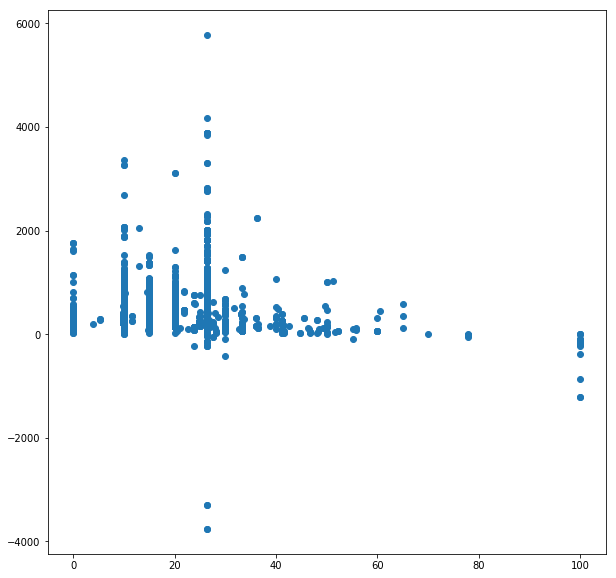

In [56]:
fig = plt.figure(figsize = (10,10))
plt.scatter(df.discount,df.profit)

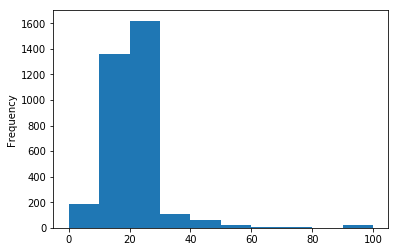

In [57]:
df.discount.plot.hist()

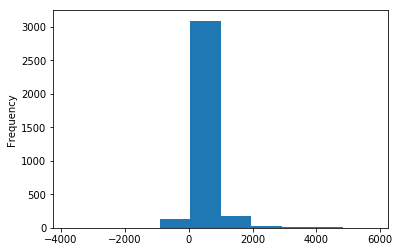

In [58]:
df.profit.plot.hist()

In [65]:
df.loc[df['Extended Price'] == 0,'Extended Price'] = np.nan

Product Name                  0
Order Number                  0
Sales Channel                 0
Quantity                      0
Unit Price Before Discount    0
Unit Price AFTER Discount     0
Extended Price                0
Shipping Method               0
Default Cost                  0
CATEGORY                      0
profit                        0
discount                      0
profit_pct                    0
dtype: int64

In [62]:
df.loc[df['Default Cost'] == 0,'Default Cost'] = np.nan

In [63]:
# does whether have discount play a role in profit?
df['profit_pct'] = (df.profit/df['Default Cost']*df.Quantity)*100

In [79]:
df['profit_pct_log10'] = df.profit_pct.apply(np.log10)

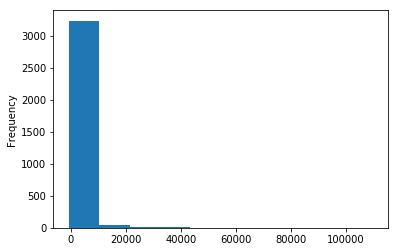

In [66]:
df['profit_pct'].plot.hist()

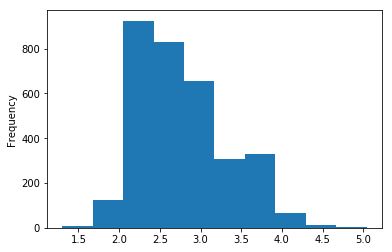

In [80]:
df.profit_pct_log10.plot.hist()

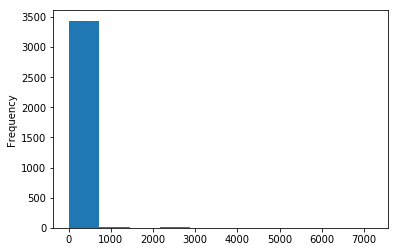

In [59]:
df.discount.plot.hist()

In [76]:
dfless5000 = df[df.profit_pct<5000]

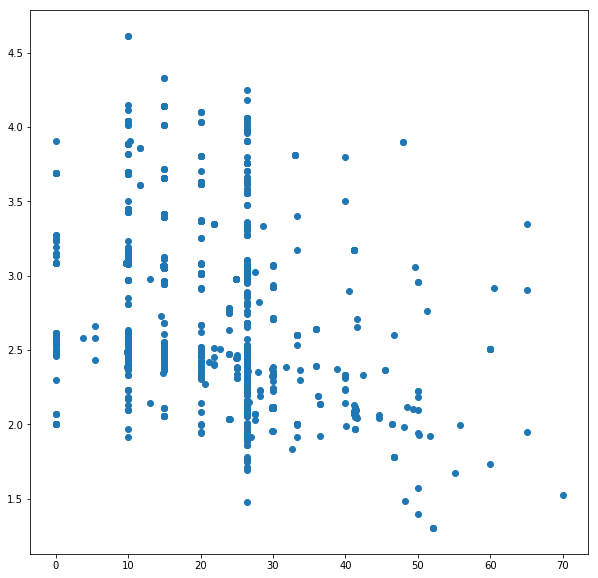

In [83]:
fig = plt.figure(figsize = (10,10))
plt.scatter(df.discount,df.profit_pct_log10)

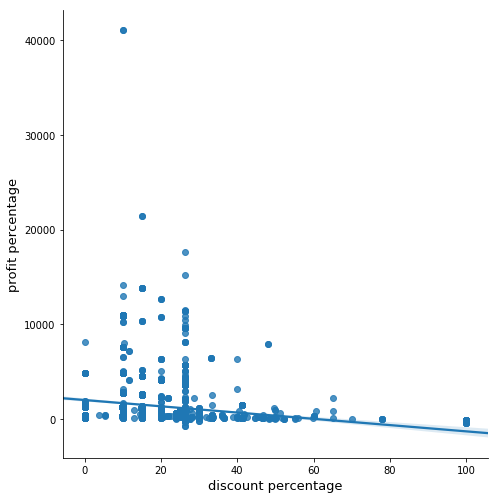

In [86]:
g = sns.lmplot(data = df,x = 'discount',y = 'profit_pct',size = 7)
g.set_xlabels('discount percentage',fontsize=13)
g.set_ylabels('profit percentage',fontsize = 13)

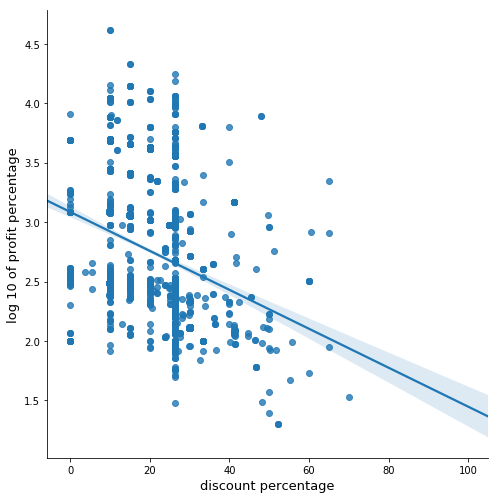

In [85]:
g = sns.lmplot(data = df,x = 'discount',y = 'profit_pct_log10',size = 7)
g.set_xlabels('discount percentage',fontsize=13)
g.set_ylabels('log 10 of profit percentage',fontsize = 13)

In [62]:
df[df.discount>6000]

,Product Name,Order Number,Sales Channel,Quantity,Unit Price Before Discount,Unit Price AFTER Discount,Extended Price,Shipping Method,Default Cost,CATEGORY,profit,discount,profit_pct
134,PRODUCTAI,141529,CHANNEL A,1,10.0,721.50,721.50,Delivery,1.0,NaN,720.50,7215.0,72050.0
217,PRODUCTAI,141547,CHANNEL A,1,10.0,678.16,678.16,Delivery,1.0,NaN,677.16,6781.6,67716.0
3402,PRODUCTAAD,142237,CHANNEL A,1,10.0,672.00,672.00,Delivery,1.0,NaN,671.00,6720.0,67100.0


In [243]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [63]:
df[['discount','profit_pct']].corr().iloc[0,1]

0.9959164264577005

In [54]:
# does whether have discount play a role in profit?
df.shape

(3457, 13)

In [55]:
(df.discount == 100).sum()

145

In [56]:
df['havedis'] = df.discount.apply(lambda x: 0 if x == 100 else 1)

In [57]:
df.head()

,Product Name,Order Number,Sales Channel,Quantity,Unit Price Before Discount,Unit Price AFTER Discount,Extended Price,Shipping Method,Default Cost,CATEGORY,profit,discount,profit_pct,havedis
0,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.0,Bars,226.00,70.000000,56.641604,1
1,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.0,Bars,226.00,70.000000,56.641604,1
2,PRODUCTAA,141492,CHANNEL A,1,195.0,143.52,143.52,Warehouse Pickup,43.0,End Tables,100.52,73.600000,70.039019,1
3,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,388.0,Tables,-100.17,44.833333,NaN,1
4,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,196.0,Bars,91.83,44.833333,31.904249,1


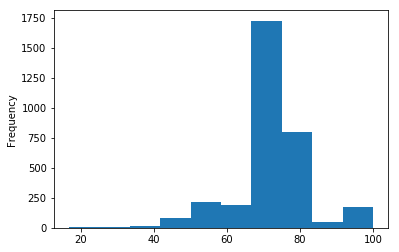

In [58]:
df[df.havedis == 1].profit_pct.plot.hist()

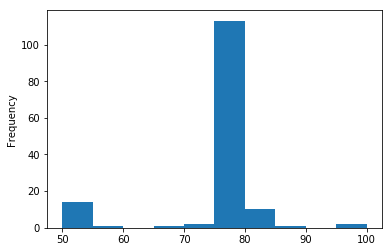

In [59]:
df[df.havedis == 0].profit_pct.plot.hist()

In [60]:
print(df[df.havedis == 1].profit_pct.mean())
print(df[df.havedis == 0].profit_pct.mean())

71.56137297839383
74.17962612868108


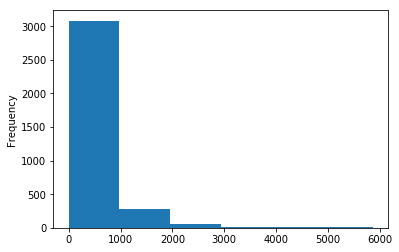

In [71]:
# Does different price group have different discount effects?
df['Unit Price AFTER Discount'].plot.hist(bins = 6)

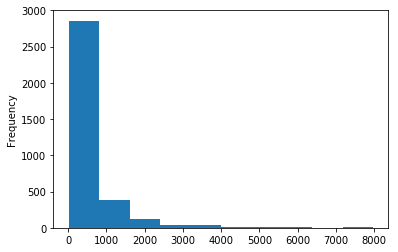

In [70]:
df['Unit Price Before Discount'].plot.hist()

In [87]:
df['price_cluster']=pd.qcut(df['Unit Price AFTER Discount'],5,labels = ['low','2_cluster','median','4_cluster','high'])

In [79]:
df.head()

,Product Name,Order Number,Sales Channel,Quantity,Unit Price Before Discount,Unit Price AFTER Discount,Extended Price,Shipping Method,Default Cost,CATEGORY,profit,discount,profit_pct,havedis,price_cluster
0,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.0,Bars,226.00,70.000000,56.641604,1,4_cluster
1,PRODUCTA,141491,CHANNEL W,1,570.0,399.00,399.00,Flat Rate Shipping,173.0,Bars,226.00,70.000000,56.641604,1,4_cluster
2,PRODUCTAA,141492,CHANNEL A,1,195.0,143.52,143.52,Warehouse Pickup,43.0,End Tables,100.52,73.600000,70.039019,1,low
3,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,388.0,Tables,-100.17,44.833333,NaN,1,4_cluster
4,PRODUCTAD,141492,CHANNEL A,1,642.0,287.83,287.83,Warehouse Pickup,196.0,Bars,91.83,44.833333,31.904249,1,4_cluster


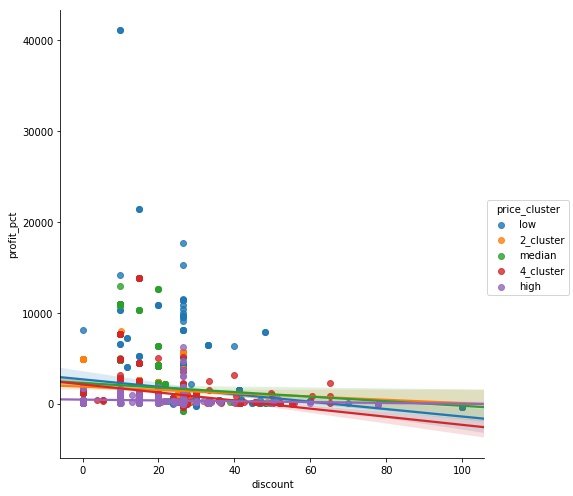

In [88]:
ax = sns.lmplot(data = df,x = 'discount',y = 'profit_pct',size = 7,hue = 'price_cluster')

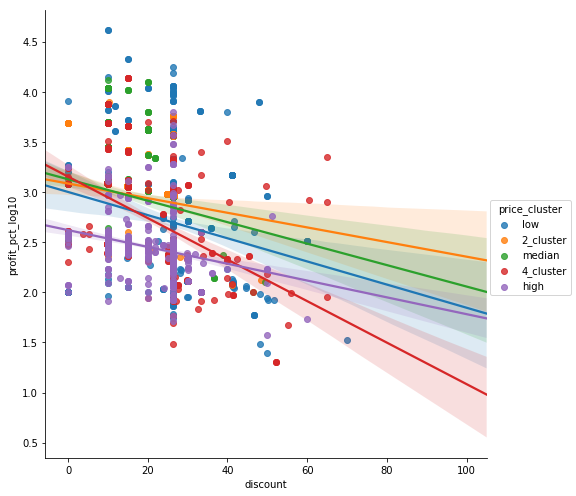

In [89]:
ax = sns.lmplot(data = df,x = 'discount',y = 'profit_pct_log10',size = 7,hue = 'price_cluster')

In [104]:
df.price_cluster.value_counts()

median       781
low          727
high         690
2_cluster    662
4_cluster    597
Name: price_cluster, dtype: int64

In [90]:
for item in df.price_cluster.unique():
    print(item + ' : '+ str(df[df.price_cluster == item]['Unit Price AFTER Discount'].min()) +', '+ \
          str(df[df.price_cluster == item]['Unit Price AFTER Discount'].max()))

4_cluster : 230.0, 514.46
low : 0.0, 165.6
high : 518.5, 5869.6
median : 193.5, 229.5
2_cluster : 166.5, 191.25


In [91]:
from sklearn import linear_model

In [87]:
lm = linear_model.LinearRegression()

In [108]:
xy = df[df.price_cluster == 'low'][['discount','profit_pct']].dropna()

In [109]:
X = xy.discount.values.reshape(-1,1)
y = xy.profit_pct
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
lm.coef_

array([0.39200731])

In [92]:
sensetivity_discount = {}
for item in ['low','2_cluster','median','4_cluster','high']:
    lm = linear_model.LinearRegression()
    xy = df[df.price_cluster == item][['discount','profit_pct']].dropna()
    X = xy.discount.values.reshape(-1,1)
    y = xy.profit_pct
    lm.fit(X,y)
    sensetivity_discount[item] = lm.coef_[0]

In [93]:
sensetivity_discount

{'2_cluster': -18.108522952323188,
 '4_cluster': -44.55157791117185,
 'high': -4.55111509229221,
 'low': -40.92141466183087,
 'median': -25.183438962507957}

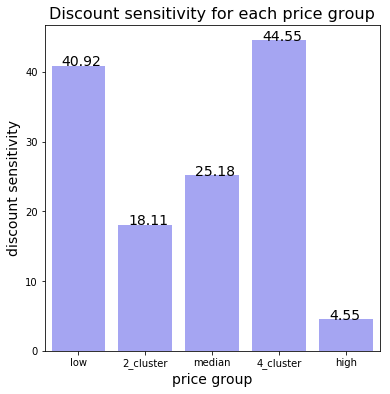

In [103]:
plt.figure(figsize=(6,6))
ax = sns.barplot(list(sensetivity_discount.keys()),[-x for x in sensetivity_discount.values()],color= 'b',\
             alpha=0.4)
ax.set_title('Discount sensitivity for each price group',fontsize = 16)
ax.set_xlabel('price group',fontsize = 14)
ax.set_ylabel('discount sensitivity',fontsize = 14)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
lst = list(sensetivity_discount.values())
for i,value in enumerate(ax.patches):
    ax.text(value.get_x()+0.15,value.get_height()+0.01,str(round(-lst[i],2)),fontsize = 14)

In [161]:
for k,v in sensetivity_discount.items():
    print(k +': '+ str(round(v,2)))

low: 0.39
2_cluster: 0.37
median: 0.51
4_cluster: 0.62
high: 0.41
